In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [2]:
data = pd.read_csv('Uber Drives.csv')

In [10]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [4]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [5]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [6]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
data = data.dropna()

In [9]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [12]:

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], infer_datetime_format=True)
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], infer_datetime_format=True)

C:\Users\napol\AppData\Local\Temp\ipykernel_15812\3039053923.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], infer_datetime_format=True)
C:\Users\napol\AppData\Local\Temp\ipykernel_15812\3039053923.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], infer_datetime_format=True)


In [14]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [17]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

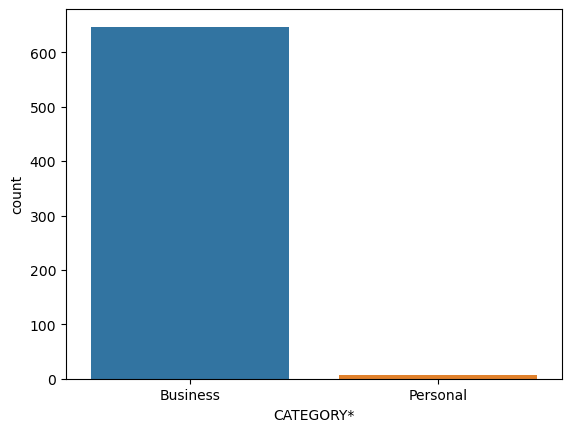

In [19]:
sns.countplot(x='CATEGORY*', data = data)

<Axes: ylabel='Frequency'>

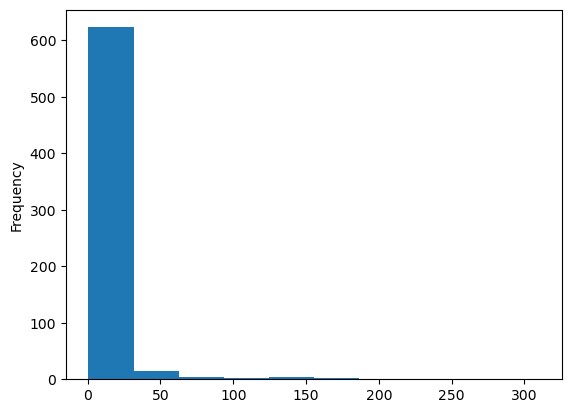

In [21]:
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Numbers of Trips vs Hours')

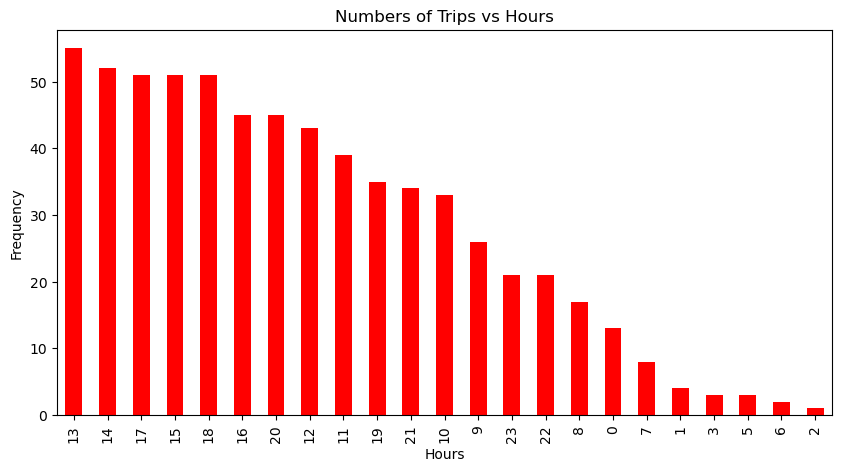

In [23]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='red', figsize=(10, 5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Numbers of Trips vs Hours')

In [24]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10.5),color='brown')

TypeError: Value after * must be an iterable, not float

In [ ]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10.5),color='blue')